# Auto-classification: robustness and higher resolution

In [2]:
include("simu_utils.jl")
gr()    # the default backend has bad quiver plot, and pyplot has the plot duplication bug
using Distributions    # to draw from uniform

bypassing the limitation (presumably a bug) of jump simulation in DifferentialEquations.jl

KD/KS = 1.5; KS = 1.0; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0


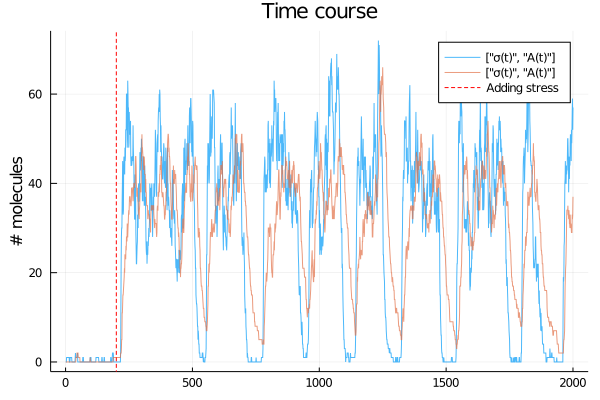

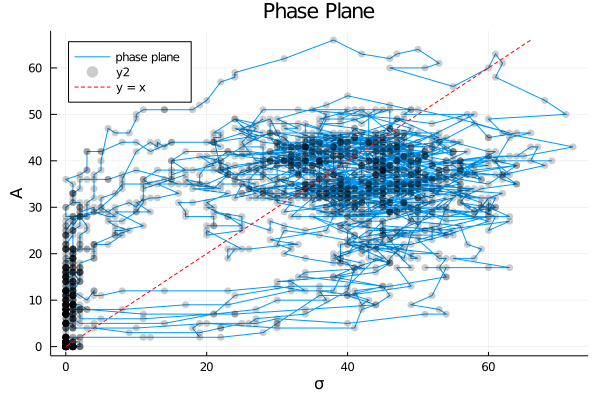

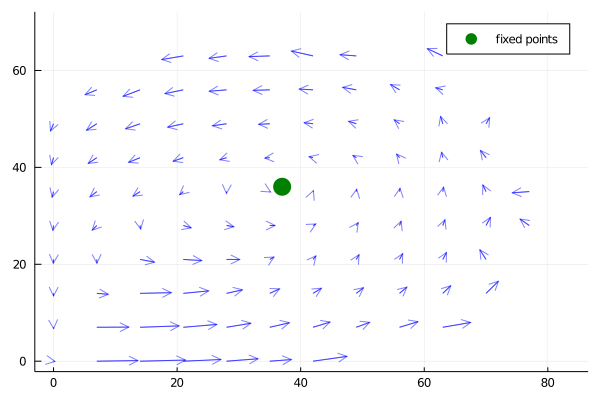

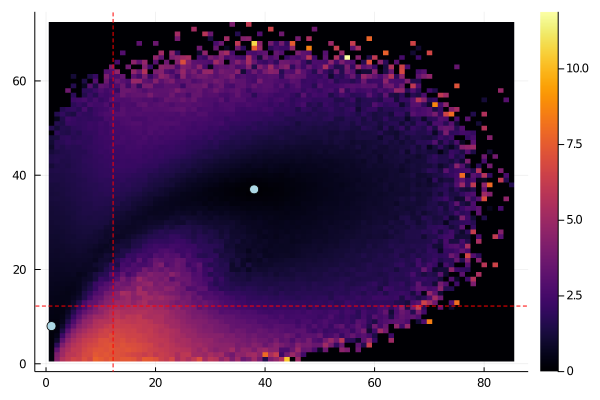

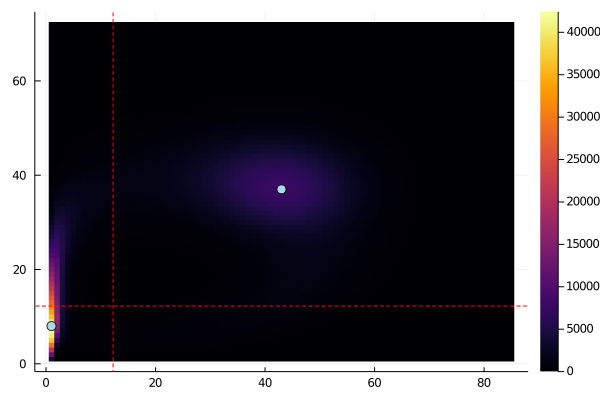

# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_anti_pulsing


:stochastic_anti_pulsing

In [3]:
# parameters for the simulation
timescale = 5.0
timespan = 1e5
repeats = 50
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 50.0
n = 3.0

# model
sigma_model = reaction_system()

# parameters to inspect
KS = exp(rand(Uniform(-5.0, 5.0)))
rK = exp(rand(Uniform(-5.0, 5.0)))
KS = 1.0
rK = 1.5

# simulation
module My
    struct My_solution
        # allows float to accomodate also SDE
        u::Array{Tuple{Float64, Float64}, 1}
        t::Array{Float64, 1}
    end
end
# due to presumably a bug in DifferentialEquations.jl, long simulations
# (~1e7) will stop at some point. Thus stitch together multiple simulations
total_iter = 0
σ_vec = zeros(Int64, Int64(timespan / dt) * repeats)
A_vec = zeros(Int64, Int64(timespan / dt) * repeats)
for i = 1:repeats
    sol = simu_all(
        sigma_model, 
        _KS = KS, 
        _rK = rK,
        _β = β, 
        _τ₁ = timescale, 
        _rτ = rτ, 
        _n = n,
        method = "ssa", 
        quiet = true,
        max_t = timespan,
        saveat = dt)
    ~, σ, A = interpret_sol(sol)
    if i > 1
        # truncate the transient dynamic upon stress
        σ = σ[sol.t .> 2 * stress_t]
        A = A[sol.t .> 2 * stress_t]
    end
    iter = length(σ)
    σ_vec[(total_iter + 1):(total_iter + iter)] .= σ
    A_vec[(total_iter + 1):(total_iter + iter)] .= A
    total_iter += iter
end
σ_vec = σ_vec[1:total_iter]
A_vec = A_vec[1:total_iter]
# construct
u = [(σ_vec[i], A_vec[i]) for i = 1:length(σ_vec)]
t = 1:length(σ_vec)
new_sol = My.My_solution(u, t)
# supplement the plots
println("KD/KS = ", rK, "; KS = ", KS, "; τ₂/τ₁ = ", rτ,
    "; β= ", β, "; n = ", n)
display(plot_timecourse(new_sol, stress_t, max_t = 2000.0))    # time course
display(plot_phase_plane(new_sol))    # phase plane

regime = classify_by_timetraj(
    new_sol, stress_t, dt, β, n, 
    thres_v = 0.003, thres_d = 1e-4, fluc_mult = 3, 
    show_vf_plot = true, show_v_heatmap = true, show_p_heatmap = true)


scale it up: the S-D map

In [ ]:
# parameters for the simulation
timescale = 5.0
timespan = 1e5
repeats = 10
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 50.0
n = 3.0

# model
sigma_model = reaction_system()

# parameters to inspect
KS = exp.(range(-5.0, stop = 5.0, length = 50))
rK = exp.(range(-5.0, stop = 5.0, length = 50))

# simulation
# initialize
behaviors = Array{Symbol, 2}(undef, length(rK), length(KS))
module My
    struct My_solution
        # allows float to accomodate also SDE
        u::Array{Tuple{Float64, Float64}, 1}
        t::Array{Float64, 1}
    end
end
# due to presumably a bug in DifferentialEquations.jl, long simulations
# (~1e7) will stop at some point. Thus stitch together multiple simulations
for j = 1:length(rK)
    for k = 1:length(KS)
        println("# ", (j - 1) * length(KS) + k)
        total_iter = 0
        σ_vec = zeros(Int64, Int64(timespan / dt) * repeats)
        A_vec = zeros(Int64, Int64(timespan / dt) * repeats)
        for i = 1:repeats
            sol = simu_all(
                sigma_model, 
                _KS = KS[k], 
                _rK = rK[j],
                _β = β, 
                _τ₁ = timescale, 
                _rτ = rτ, 
                _n = n,
                method = "ssa", 
                quiet = true,
                max_t = timespan,
                saveat = dt)
            ~, σ, A = interpret_sol(sol)
            if i > 1
                # truncate the transient dynamic upon stress
                σ = σ[sol.t .> 2 * stress_t]
                A = A[sol.t .> 2 * stress_t]
            end
            iter = length(σ)
            σ_vec[(total_iter + 1):(total_iter + iter)] .= σ
            A_vec[(total_iter + 1):(total_iter + iter)] .= A
            total_iter += iter
        end
        σ_vec = σ_vec[1:total_iter]
        A_vec = A_vec[1:total_iter]
        # construct
        u = [(σ_vec[i], A_vec[i]) for i = 1:length(σ_vec)]
        t = 1:length(σ_vec)
        new_sol = My.My_solution(u, t)
        # supplement the plots
        println("KD/KS = ", rK[j], "; KS = ", KS[k], "; τ₂/τ₁ = ", rτ,
            "; β= ", β, "; n = ", n)
#         display(plot_timecourse(new_sol, stress_t, max_t = 2000.0))    # time course
#         display(plot_phase_plane(new_sol))    # phase plane

        regime = classify_by_timetraj(
            new_sol, stress_t, dt, β, n, 
            thres_v = 0.003, thres_d = 1e-4, fluc_mult = 3)
        
        behaviors[j, k] = regime
    end
end

# 1


KD/KS = 0.006737946999085467; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 2
KD/KS = 0.006737946999085467; KS = 0.008263406499327719; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 3
KD/KS = 0.006737946999085467; KS = 0.010134227381485734; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 4
KD/KS = 0.006737946999085467; KS = 0.012428598862710048; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 5
KD/KS =

# 35
KD/KS = 0.006737946999085467; KS = 6.950235265842222; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 36
KD/KS = 0.006737946999085467; KS = 8.5237564610426; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 37
KD/KS = 0.006737946999085467; KS = 10.453520122438803; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 38
KD/KS = 0.006737946999085467; KS = 12.820178925767504; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 39
KD/KS = 0.006737946

KD/KS = 0.008263406499327719; KS = 0.26539642902432975; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 70
KD/KS = 0.008263406499327719; KS = 0.325481719698252; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 71
KD/KS = 0.008263406499327719; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 72
KD/KS = 0.008263406499327719; KS = 0.4895416595569531; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 73
KD/KS = 0.00

# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 103
KD/KS = 0.010134227381485734; KS = 0.010134227381485734; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 104
KD/KS = 0.010134227381485734; KS = 0.012428598862710048; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 105
KD/KS = 0.010134227381485734; KS = 0.015242412063139558; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 106
KD/KS = 0.010134227381485734; KS = 0.018693267685999052; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0


KD/KS = 0.010134227381485734; KS = 8.5237564610426; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 137
KD/KS = 0.010134227381485734; KS = 10.453520122438803; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 138
KD/KS = 0.010134227381485734; KS = 12.820178925767504; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 139
KD/KS = 0.010134227381485734; KS = 15.722645172499927; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 140
KD/KS = 0.0101342273814857

KD/KS = 0.012428598862710048; KS = 0.325481719698252; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 171
KD/KS = 0.012428598862710048; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 172
KD/KS = 0.012428598862710048; KS = 0.4895416595569531; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 173
KD/KS = 0.012428598862710048; KS = 0.6003730411984044; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 174
KD/KS = 0

# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 204
KD/KS = 0.015242412063139558; KS = 0.012428598862710048; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 205
KD/KS = 0.015242412063139558; KS = 0.015242412063139558; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 206
KD/KS = 0.015242412063139558; KS = 0.018693267685999052; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 207
KD/KS = 0.015242412063139558; KS = 0.022925391029511435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0


KD/KS = 0.015242412063139558; KS = 10.453520122438803; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 238
KD/KS = 0.015242412063139558; KS = 12.820178925767504; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 239
KD/KS = 0.015242412063139558; KS = 15.722645172499927; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 240
KD/KS = 0.015242412063139558; KS = 19.282224737400533; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 241
KD/KS = 0.0152424120631

# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 271
KD/KS = 0.018693267685999052; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 272
KD/KS = 0.018693267685999052; KS = 0.4895416595569531; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 273
KD/KS = 0.018693267685999052; KS = 0.6003730411984044; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 274
KD/KS = 0.018693267685999052; KS = 0.7362964551863367; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1,

# 304
KD/KS = 0.022925391029511435; KS = 0.012428598862710048; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 305
KD/KS = 0.022925391029511435; KS = 0.015242412063139558; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 306
KD/KS = 0.022925391029511435; KS = 0.018693267685999052; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 307
KD/KS = 0.022925391029511435; KS = 0.022925391029511435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing


KD/KS = 0.022925391029511435; KS = 10.453520122438803; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 338
KD/KS = 0.022925391029511435; KS = 12.820178925767504; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 339
KD/KS = 0.022925391029511435; KS = 15.722645172499927; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 340
KD/KS = 0.022925391029511435; KS = 19.282224737400533; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 341
KD/KS = 0.0229253910295

# 371
KD/KS = 0.028115659748972035; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 372
KD/KS = 0.028115659748972035; KS = 0.4895416595569531; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 373
KD/KS = 0.028115659748972035; KS = 0.6003730411984044; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 374
KD/KS = 0.028115659748972035; KS = 0.7362964551863367; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 375
KD

The dynamical behaviour is: stochastic_pulsing
# 405
KD/KS = 0.03448099629368951; KS = 0.015242412063139558; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 406
KD/KS = 0.03448099629368951; KS = 0.018693267685999052; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 407
KD/KS = 0.03448099629368951; KS = 0.022925391029511435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 408
KD/KS = 0.03448099629368951; KS = 0.028115659748972035; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The 

KD/KS = 0.03448099629368951; KS = 12.820178925767504; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 439
KD/KS = 0.03448099629368951; KS = 15.722645172499927; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: true
The dynamical behaviour is: no_expression
# 440
KD/KS = 0.03448099629368951; KS = 19.282224737400533; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 441
KD/KS = 0.03448099629368951; KS = 23.647686934634528; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 442
KD/KS = 0.0344809962936895

KD/KS = 0.04228743397881315; KS = 0.4895416595569531; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 473
KD/KS = 0.04228743397881315; KS = 0.6003730411984044; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 474
KD/KS = 0.04228743397881315; KS = 0.7362964551863367; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 475
KD/KS = 0.04228743397881315; KS = 0.9029926940720301; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 476
KD/KS = 0.04

KD/KS = 0.05186123560007898; KS = 0.018693267685999052; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 507
KD/KS = 0.05186123560007898; KS = 0.022925391029511435; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 508
KD/KS = 0.05186123560007898; KS = 0.028115659748972035; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 509
KD/KS = 0.05186123560007898; KS = 0.03448099629368951; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 510
KD/KS

# 540
KD/KS = 0.05186123560007898; KS = 19.282224737400533; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 541
KD/KS = 0.05186123560007898; KS = 23.647686934634528; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 542
KD/KS = 0.05186123560007898; KS = 29.001482192758264; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 543
KD/KS = 0.05186123560007898; KS = 35.567367400530664; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 544
KD/KS = 0.05186123

# 574
KD/KS = 0.0636025292836268; KS = 0.7362964551863367; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 575
KD/KS = 0.0636025292836268; KS = 0.9029926940720301; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 576
KD/KS = 0.0636025292836268; KS = 1.1074286719757578; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 577
KD/KS = 0.0636025292836268; KS = 1.358148600276674; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 578
KD/KS = 0.0

KD/KS = 0.07800203146853764; KS = 0.028115659748972035; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 609
KD/KS = 0.07800203146853764; KS = 0.03448099629368951; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 610
KD/KS = 0.07800203146853764; KS = 0.04228743397881315; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 611
KD/KS = 0.07800203146853764; KS = 0.05186123560007898; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 612
KD/KS =

KD/KS = 0.07800203146853764; KS = 29.001482192758264; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 643
KD/KS = 0.07800203146853764; KS = 35.567367400530664; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 644
KD/KS = 0.07800203146853764; KS = 43.61975761777491; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 645
KD/KS = 0.07800203146853764; KS = 53.49519499734032; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: false, has forward flow: false
The dynamical behaviour is: no_expression
# 646
KD/KS = 0.0780020314685376

KD/KS = 0.0956615559435782; KS = 0.9029926940720301; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 676
KD/KS = 0.0956615559435782; KS = 1.1074286719757578; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 677
KD/KS = 0.0956615559435782; KS = 1.358148600276674; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 678
KD/KS = 0.0956615559435782; KS = 1.6656310849732698; τ₂/τ₁ = 5.0; β= 50.0; n = 3.0
# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing
# 679
KD/KS = 0.0956615

make the plot

In [1]:
num_behaviors = zeros(Int64, size(behaviors)...)

sym2num = Dict(:oscillation => 1, :stochastic_pulsing => 2, :no_expression => 3,
    :stochastic_anti_pulsing => 4, :het_activation => 5, :stochastic_switching => 6,
    :undefined=> 7, :homo_activation => 8)
color_grad = cgrad([:red, :yellow, :white, :purple, :turquoise, :green, :black, :darkblue], categorical = true)

for i = 1:size(behaviors, 1)
    for j = 1:size(behaviors, 2)
        num_behaviors[i, j] = sym2num[behaviors[i, j]]
    end
end

heatmap(rK, KS, num_behaviors', c = color_grad, xaxis = :log, yaxis = :log,
    xlabel = "rK", ylabel = "KS")

LoadError: UndefVarError: behaviors not defined

The bug when simulation is too long

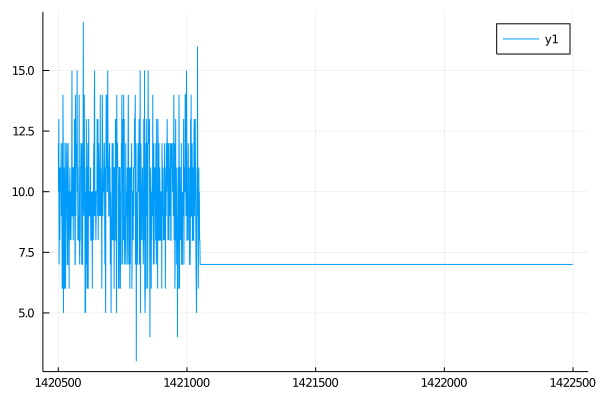

In [1]:
using DifferentialEquations, StochasticDiffEq, DiffEqJump, Catalyst, Plots, Random

# hopefully in order to reproduce
Random.seed!(7777)

# model definition
model = @reaction_network begin
    100.0, ∅ --> A
    A, A --> ∅
end

# simulation
u0 = [0.0]
tspan = (0.0, 1e7)
dprob = DiscreteProblem(model, u0, tspan, nothing)
jprob = JumpProblem(model, dprob, Direct(), save_positions = (false, false))
sol = solve(jprob, SSAStepper(), saveat = 1.0)

# plot
start = 1420500
A = [u[1] for u in sol.u]
plot(sol.t[(start+1):(start+2000)], A[(start+1):(start+2000)])